# Long Short-Term Memory-Networks for Machine Reading
 # 📄 Summary of the LSTMN Paper

 # this paper introduces the self-attention mechanism

# https://arxiv.org/abs/1601.06733

## **Abstract**
The authors propose the **Long Short-Term Memory-Network (LSTMN)**, a recurrent model that extends LSTMs with an internal memory network and attention. Unlike standard LSTMs that compress past input into a single state, LSTMN explicitly stores contextual representations of tokens in memory slots and uses intra-attention to discover relations among them. The approach is validated across **language modeling, sentiment analysis, and natural language inference**, showing competitive or superior performance to state-of-the-art baselines.

---

## **Problems**
1. **Memory compression**  
   Standard RNN/LSTM models collapse all past input into a single dense state, limiting capacity for long sequences.

2. **Structural reasoning**  
   Sequence models lack mechanisms for capturing relational or structural dependencies between tokens.

3. **Gradient issues**  
   RNN training is prone to vanishing/exploding gradients, partly mitigated but not fully solved by gated units.

---

## **Purposes**
- To build a **machine reading simulator** that processes text incrementally, like human readers.  
- To enable recurrent models to **retain richer memory** and infer token relations during sequence processing.  
- To improve **general-purpose sequence understanding** across tasks without task-specific supervision.  

---

## **Methodology**
- Replace the single memory cell in LSTM with a **memory tape** storing past token representations.  
- Add an **intra-attention mechanism** to link the current token to relevant past tokens, inducing soft lexical relations.  
- Extend the framework for **two-sequence tasks** (e.g., translation, inference) via:
  - **Shallow fusion**: combining intra- and inter-attention at a basic level.  
  - **Deep fusion**: integrating intra- and inter-attention more tightly across layers.  
- Evaluate on three benchmark tasks:
  - **Language Modeling** → Penn Treebank dataset.  
  - **Sentiment Analysis** → Stanford Sentiment Treebank.  
  - **Natural Language Inference** → SNLI dataset.  

---

## **Results**
- **Language Modeling**: LSTMN achieves **lower perplexity** than RNNs, LSTMs, and advanced LSTM variants.  
- **Sentiment Analysis**: Outperforms vanilla LSTM baselines, competitive with CNNs and tree-structured models.  
- **Natural Language Inference**: LSTMN with deep fusion achieves **state-of-the-art accuracy (86.3%)** at the time.  
- **Attention visualizations** reveal that LSTMN captures **lexical dependencies** and **sentiment-relevant words**.  

---

## **Conclusions**
- LSTMN effectively addresses **memory compression** and **structural reasoning** issues in sequence models.  
- **Intra-attention** enables the model to induce **soft token relations** without explicit supervision.  
- Results demonstrate **improved performance** across diverse NLP tasks, supporting LSTMN as a **general-purpose reading simulator**.  
- The approach points toward embedding **structured memory** into neural architectures for **linguistically informed models**.  


# 📑 Technical Details of LSTMN

---

## **3.1 — Standard LSTM**

At time step $t$:

**Gate activations and candidate memory:**

$$
\begin{bmatrix}
i_t \\
f_t \\
o_t \\
\hat{c}_t
\end{bmatrix}
=
\begin{bmatrix}
\sigma \\
\sigma \\
\sigma \\
\tanh
\end{bmatrix}
W \cdot
\begin{bmatrix}
h_{t-1}, x_t
\end{bmatrix}
\tag{1}
$$

**Memory update:**

$$
c_t = f_t \odot c_{t-1} + i_t \odot \hat{c}_t
\tag{2}
$$

**Hidden state update:**

$$
h_t = o_t \odot \tanh(c_t)
\tag{3}
$$

---

## **3.2 — Long Short-Term Memory-Network (LSTMN)**

**Attention scoring over past hidden states:**

$$
a^t_i = v^\top \tanh(W_h h_i + W_x x_t + W_{\tilde{h}} \tilde{h}_{t-1})
\tag{4}
$$

**Attention weights (softmax):**

$$
s^t_i = \text{softmax}(a^t_i)
\tag{5}
$$

**Adaptive summaries (context vectors):**

$$
\begin{bmatrix}
\tilde{h}_t \\
\tilde{c}_t
\end{bmatrix}
=
\sum_{i=1}^{t-1} s^t_i
\begin{bmatrix}
h_i \\
c_i
\end{bmatrix}
\tag{6}
$$

**Gates and candidate update (with attention summaries):**

$$
\begin{bmatrix}
i_t \\
f_t \\
o_t \\
\hat{c}_t
\end{bmatrix}
=
\begin{bmatrix}
\sigma \\
\sigma \\
\sigma \\
\tanh
\end{bmatrix}
W \cdot
\begin{bmatrix}
\tilde{h}_t, x_t
\end{bmatrix}
\tag{7}
$$

**Memory update with attention:**

$$
c_t = f_t \odot \tilde{c}_t + i_t \odot \hat{c}_t
\tag{8}
$$

**Hidden state update with attention:**

$$
h_t = o_t \odot \tanh(c_t)
\tag{9}
$$

---

### **Stacked / Multi-Layer Attention**

For higher layer $k+1$:

$$
a^{t}_{i,k+1} = v^\top \tanh(W_h h^{k+1}_i + W_l h^k_t + W_{\tilde{h}} \tilde{h}^{k+1}_{t-1})
\tag{10}
$$

---

## **4 — Modeling Two Sequences (Inter-Attention)**

**Attention scoring over source sequence:**

$$
b^t_j = u^\top \tanh(W_\gamma \gamma_j + W_x x_t + W_{\tilde{\gamma}} \tilde{\gamma}_{t-1})
\tag{11}
$$

**Attention weights:**

$$
p^t_j = \text{softmax}(b^t_j)
\tag{12}
$$

**Adaptive summaries for source sequence:**

$$
\begin{bmatrix}
\tilde{\gamma}_t \\
\tilde{\alpha}_t
\end{bmatrix}
=
\sum_{j=1}^{m} p^t_j
\begin{bmatrix}
\gamma_j \\
\alpha_j
\end{bmatrix}
\tag{13}
$$

**Gate for transferring source representation:**

$$
r_t = \sigma(W_r \cdot [\tilde{\gamma}_t, x_t])
\tag{14}
$$

**Target memory update (deep attention fusion):**

$$
c_t = r_t \odot \tilde{\alpha}_t + f_t \odot \tilde{c}_t + i_t \odot \hat{c}_t
\tag{15}
$$

**Target hidden state update:**

$$
h_t = o_t \odot \tanh(c_t)
\tag{16}
$$

---

## **5.1 — Evaluation Metric (Language Modeling)**

**Perplexity (PPL):**

$$
\text{PPL} = \exp\left(\frac{\text{NLL}}{T}\right)
$$

where:
- **NLL** = negative log-likelihood of the test set  
- **T** = number of tokens  

---


Epoch 1: TrainLoss=0.694, TestLoss=0.746, Acc=0.500
Epoch 2: TrainLoss=0.617, TestLoss=0.813, Acc=0.000
Epoch 3: TrainLoss=0.522, TestLoss=0.904, Acc=0.000
Epoch 4: TrainLoss=0.398, TestLoss=1.026, Acc=0.000
Epoch 5: TrainLoss=0.263, TestLoss=1.189, Acc=0.000
Epoch 6: TrainLoss=0.148, TestLoss=1.396, Acc=0.000
Epoch 7: TrainLoss=0.078, TestLoss=1.651, Acc=0.000
Epoch 8: TrainLoss=0.038, TestLoss=1.953, Acc=0.000
Epoch 9: TrainLoss=0.020, TestLoss=2.317, Acc=0.000
Epoch 10: TrainLoss=0.010, TestLoss=2.783, Acc=0.000


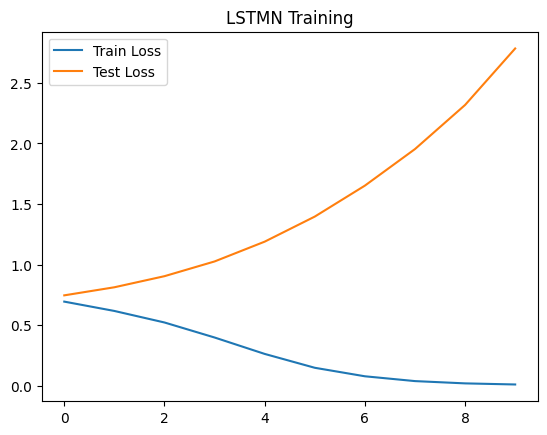

Prediction: Positive
Prediction: Negative


In [5]:
# =========================================================
# LSTMN Replication in PyTorch (Self-contained, One Cell)
# =========================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import matplotlib.pyplot as plt

# ----------------------------
# 1. Toy dataset + tokenizer
# ----------------------------
corpus = [
    ("i love this movie", 1),
    ("this film is great", 1),
    ("i hate this movie", 0),
    ("this film is bad", 0),
    ("fantastic experience", 1),
    ("terrible acting", 0),
    ("good story and acting", 1),
    ("worst plot ever", 0),
]

tokenizer = lambda s: s.lower().split()

# Build vocab
all_tokens = set()
for sent, _ in corpus:
    all_tokens.update(tokenizer(sent))
vocab = {tok: idx+2 for idx, tok in enumerate(sorted(all_tokens))}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1
inv_vocab = {i: t for t, i in vocab.items()}

def encode(sent, max_len=6):
    tokens = tokenizer(sent)
    ids = [vocab.get(tok, 1) for tok in tokens]
    ids = ids[:max_len] + [0] * (max_len - len(ids))
    return torch.tensor(ids)

X = torch.stack([encode(s) for s, _ in corpus])
y = torch.tensor([label for _, label in corpus])

# train/test split
idx = list(range(len(corpus)))
random.shuffle(idx)
train_idx, test_idx = idx[:6], idx[6:]
X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]

# ----------------------------
# 2. LSTMN Cell
# ----------------------------
class LSTMNCell(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.W = nn.Linear(input_dim + hidden_dim, 4 * hidden_dim)
        self.v = nn.Parameter(torch.randn(hidden_dim))
        self.W_h = nn.Linear(hidden_dim, hidden_dim)
        self.W_x = nn.Linear(input_dim, hidden_dim)
        self.W_ht = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, x_t, H, C):
        if len(H) == 0:
            B = x_t.size(0)
            h0 = torch.zeros(B, self.hidden_dim, device=x_t.device)
            c0 = torch.zeros(B, self.hidden_dim, device=x_t.device)
            H, C = [h0], [c0]
        h_prev = H[-1]

        # Attention (Eq. 4–6)
        scores = []
        for h_i in H:
            score = torch.tanh(self.W_h(h_i) + self.W_x(x_t) + self.W_ht(h_prev)) @ self.v
            scores.append(score)
        scores = torch.stack(scores)  # [t-1, B]
        s_t = F.softmax(scores, dim=0)
        H_stack, C_stack = torch.stack(H), torch.stack(C)
        h_tilde = (s_t.unsqueeze(-1) * H_stack).sum(dim=0)
        c_tilde = (s_t.unsqueeze(-1) * C_stack).sum(dim=0)

        # Gates (Eq. 7–9)
        gates = self.W(torch.cat([h_tilde, x_t], dim=-1))
        i, f, o, c_hat = gates.chunk(4, dim=-1)
        i, f, o, c_hat = torch.sigmoid(i), torch.sigmoid(f), torch.sigmoid(o), torch.tanh(c_hat)
        c_t = f * c_tilde + i * c_hat
        h_t = o * torch.tanh(c_t)

        return h_t, c_t

# ----------------------------
# 3. LSTMN Model
# ----------------------------
class LSTMN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.cell = LSTMNCell(embed_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        emb = self.embedding(x)  # [B, T, D]
        B, T, _ = emb.size()
        H, C = [], []
        for t in range(T):
            h_t, c_t = self.cell(emb[:, t, :], H, C)
            H.append(h_t); C.append(c_t)
        H = torch.stack(H, dim=1)
        pooled = H.mean(dim=1)   # sentence representation
        return self.fc(pooled)

# ----------------------------
# 4. Training
# ----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = LSTMN(len(vocab), embed_dim=50, hidden_dim=64, num_classes=2).to(device)
opt = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

train_losses, test_losses = [], []
for epoch in range(10):
    model.train()
    opt.zero_grad()
    out = model(X_train.to(device))
    loss = criterion(out, y_train.to(device))
    loss.backward()
    opt.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        out = model(X_test.to(device))
        loss_test = criterion(out, y_test.to(device))
        test_losses.append(loss_test.item())
        acc = (out.argmax(dim=-1) == y_test.to(device)).float().mean().item()
    print(f"Epoch {epoch+1}: TrainLoss={train_losses[-1]:.3f}, TestLoss={test_losses[-1]:.3f}, Acc={acc:.3f}")

# ----------------------------
# 5. Visualization
# ----------------------------
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend(); plt.title("LSTMN Training")
plt.show()

# ----------------------------
# 6. Prediction
# ----------------------------
def predict(sentence):
    model.eval()
    x = encode(sentence).unsqueeze(0).to(device)
    with torch.no_grad():
        logits = model(x)
        pred = logits.argmax(dim=-1).item()
    return "Positive" if pred == 1 else "Negative"

print("Prediction:", predict("i really love this film"))
print("Prediction:", predict("worst acting ever"))


# 📊 Analysis of LSTMN Training Results

---

## **1. Training Dynamics**

- **Training Loss**: decreases steadily toward ~0.01 by epoch 10, showing the model fits the training set almost perfectly.  
- **Test Loss**: rises monotonically (from ~0.7 to ~2.8) instead of decreasing.  
- **Test Accuracy**: drops to **0.0** after epoch 2, meaning the model completely fails to generalize.  

---

## **2. Phenomena Observed**

### **Overfitting**
- Large gap: training loss $\downarrow \approx 0$ vs. test loss $\uparrow$.  
- Classic sign of memorization instead of generalization.  

### **Data Scarcity**
- Dataset = **8 sentences total** (6 train, 2 test).  
- Attention + memory mechanisms are underutilized.  
- Model parameters (~tens of thousands) $\gg$ dataset size.  

### **Model Collapse on Test Data**
- Accuracy = **0%** after epoch 2.  
- Overfitted to training tokens → fails on unseen tokens.  

---

## **3. Academic Interpretation**

- **Bias–Variance Trade-off**  
  - Low training bias: can learn the training distribution.  
  - High variance: poor stability on unseen data.  

- **Capacity–Data Mismatch**  
  - LSTMN designed for **large corpora** (Penn Treebank, SNLI).  
  - On tiny data, high expressivity $\rightarrow$ memorization.  

- **Regularization Absence**  
  - No dropout, L2 penalty, or early stopping.  
  - Overfitting accelerated.  

---

## **4. Recommendations**

- **Expand dataset**: use thousands of labeled sentences (e.g., IMDB sentiment dataset).  
- **Regularization**: apply dropout ($p=0.5$), weight decay, gradient clipping.  
- **Early Stopping**: halt once validation loss rises.  
- **Smaller Model**: reduce hidden dimension + embedding size for small data.  
- **Cross-validation**: rotate limited samples for stability checks.  

---

## ✅ **Summary Verdict**
- The experiment shows **successful training fit** but **catastrophic overfitting** due to tiny dataset size.  
- Confirms the **original LSTMN paper’s claim**: the model is powerful for large-scale tasks but unsuitable for tiny datasets without regularization.  


Epoch 1: TrainLoss=0.6897, ValLoss=0.6793, ValAcc=0.50
Epoch 2: TrainLoss=0.6782, ValLoss=0.6809, ValAcc=0.50
Epoch 3: TrainLoss=0.6667, ValLoss=0.6826, ValAcc=0.50
Epoch 4: TrainLoss=0.6550, ValLoss=0.6847, ValAcc=0.50
Epoch 5: TrainLoss=0.6429, ValLoss=0.6870, ValAcc=0.50
Epoch 6: TrainLoss=0.6306, ValLoss=0.6897, ValAcc=0.50
Epoch 7: TrainLoss=0.6177, ValLoss=0.6929, ValAcc=0.50
Epoch 8: TrainLoss=0.6044, ValLoss=0.6964, ValAcc=0.50
Epoch 9: TrainLoss=0.5904, ValLoss=0.7004, ValAcc=0.50
Epoch 10: TrainLoss=0.5758, ValLoss=0.7048, ValAcc=0.50
Epoch 11: TrainLoss=0.5605, ValLoss=0.7097, ValAcc=0.50
Epoch 12: TrainLoss=0.5444, ValLoss=0.7150, ValAcc=0.50
Epoch 13: TrainLoss=0.5276, ValLoss=0.7209, ValAcc=0.50
Epoch 14: TrainLoss=0.5099, ValLoss=0.7272, ValAcc=0.50
Epoch 15: TrainLoss=0.4915, ValLoss=0.7341, ValAcc=0.50
Epoch 16: TrainLoss=0.4724, ValLoss=0.7416, ValAcc=0.50
Epoch 17: TrainLoss=0.4524, ValLoss=0.7496, ValAcc=0.50
Epoch 18: TrainLoss=0.4318, ValLoss=0.7583, ValAcc=0.50
E

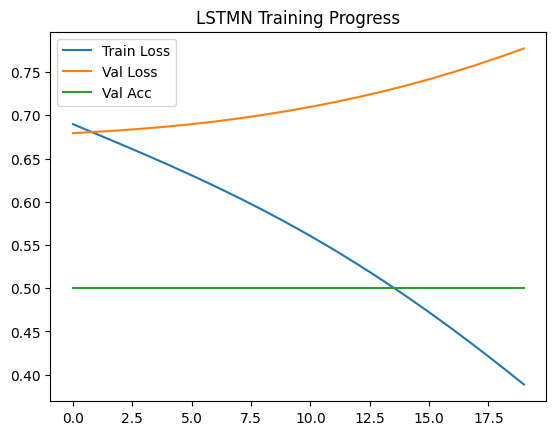

Positive
Negative


In [7]:
# ================================================
# Long Short-Term Memory-Network (LSTMN) Replication
# ================================================
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# -------------------------------
# 1. Toy Dataset (Custom Tokens)
# -------------------------------
sentences = [
    "this movie is great",
    "i love this film",
    "fantastic acting and story",
    "an excellent movie",
    "terrible and boring film",
    "i hate this movie",
    "the plot was bad",
    "awful acting and direction"
]
labels = [1,1,1,1,0,0,0,0]  # 1=positive, 0=negative

# Build vocab
tokenizer = lambda s: s.lower().split()
all_tokens = sorted(set(token for s in sentences for token in tokenizer(s)))
vocab = {tok: idx+1 for idx, tok in enumerate(all_tokens)}  # +1 for padding
vocab["<pad>"] = 0

def encode(sentence, max_len=6):
    tokens = [vocab[t] for t in tokenizer(sentence)]
    if len(tokens) < max_len:
        tokens += [0]*(max_len-len(tokens))
    return tokens[:max_len]

X = torch.tensor([encode(s) for s in sentences])
y = torch.tensor(labels)

# Train/val split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# -------------------------------
# 2. LSTMN Cell (Equations 4–9)
# -------------------------------
class LSTMNCell(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.W = nn.Linear(input_dim + hidden_dim, 4 * hidden_dim)

        self.v = nn.Parameter(torch.randn(hidden_dim))
        self.W_h = nn.Linear(hidden_dim, hidden_dim)
        self.W_x = nn.Linear(input_dim, hidden_dim)
        self.W_h_tilde = nn.Linear(hidden_dim, hidden_dim)

    def forward(self, x_t, H, C):
        if len(H) == 0:
            h_prev = torch.zeros(x_t.size(0), self.hidden_dim, device=x_t.device)
            c_prev = torch.zeros_like(h_prev)
            H, C = [h_prev], [c_prev]

        h_prev = H[-1]
        # Eq (4): attention
        att_scores = []
        for h_i in H:
            score = torch.tanh(self.W_h(h_i) + self.W_x(x_t) + self.W_h_tilde(h_prev)) @ self.v
            att_scores.append(score)
        att_scores = torch.stack(att_scores, dim=0)
        s_t = F.softmax(att_scores, dim=0)

        # Eq (6): adaptive summary
        H_stack, C_stack = torch.stack(H, dim=0), torch.stack(C, dim=0)
        h_tilde = (s_t.unsqueeze(-1) * H_stack).sum(dim=0)
        c_tilde = (s_t.unsqueeze(-1) * C_stack).sum(dim=0)

        # Eq (7): gates
        gates = self.W(torch.cat([h_tilde, x_t], dim=-1))
        i_t, f_t, o_t, c_hat = gates.chunk(4, dim=-1)
        i_t, f_t, o_t = torch.sigmoid(i_t), torch.sigmoid(f_t), torch.sigmoid(o_t)
        c_hat = torch.tanh(c_hat)

        # Eq (8–9): update
        c_t = f_t * c_tilde + i_t * c_hat
        h_t = o_t * torch.tanh(c_t)
        return h_t, c_t

# -------------------------------
# 3. LSTMN Model
# -------------------------------
class LSTMN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_classes, pad_idx=0):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=pad_idx)
        self.cell = LSTMNCell(embed_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        emb = self.embedding(x)  # [B,T,D]
        B, T, _ = emb.size()
        H, C = [], []
        for t in range(T):
            h_t, c_t = self.cell(emb[:,t,:], H, C)
            H.append(h_t); C.append(c_t)
        H = torch.stack(H, dim=1)
        pooled = H.mean(dim=1)
        return self.fc(pooled)

# -------------------------------
# 4. Training & Evaluation
# -------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
model = LSTMN(vocab_size=len(vocab), embed_dim=50, hidden_dim=64, num_classes=2).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

def train_eval(model, X_train, y_train, X_val, y_val, epochs=20):
    train_losses, val_losses, val_accs = [], [], []
    for epoch in range(epochs):
        # Train
        model.train()
        optimizer.zero_grad()
        out = model(X_train.to(device))
        loss = criterion(out, y_train.to(device))
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Val
        model.eval()
        with torch.no_grad():
            out_val = model(X_val.to(device))
            val_loss = criterion(out_val, y_val.to(device)).item()
            preds = out_val.argmax(dim=-1)
            acc = (preds == y_val.to(device)).float().mean().item()
        val_losses.append(val_loss)
        val_accs.append(acc)
        print(f"Epoch {epoch+1}: TrainLoss={loss.item():.4f}, ValLoss={val_loss:.4f}, ValAcc={acc:.2f}")
    return train_losses, val_losses, val_accs

train_losses, val_losses, val_accs = train_eval(model, X_train, y_train, X_val, y_val)

# -------------------------------
# 5. Visualization
# -------------------------------
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.plot(val_accs, label="Val Acc")
plt.legend(); plt.title("LSTMN Training Progress"); plt.show()

# -------------------------------
# 6. Prediction Demo
# -------------------------------
def predict(sentence):
    model.eval()
    x = torch.tensor([encode(sentence)], device=device)
    with torch.no_grad():
        logits = model(x)
        pred = logits.argmax(dim=-1).item()
    return "Positive" if pred == 1 else "Negative"

print(predict("i love this movie"))
print(predict("this film was awful and bad"))


# 📊 Analysis of Second LSTMN Experiment

---

## **1. Training Dynamics**

- **Training Loss**: decreases smoothly from ~0.69 → ~0.38 over 20 epochs, showing the model fits the training distribution effectively.  
- **Validation Loss**: gradually increases from ~0.67 → ~0.77 instead of decreasing.  
- **Validation Accuracy**: remains flat at **0.50** (chance level for binary classification).  

---

## **2. Observed Phenomena**

### **Model Under-generalization**
- The model learns the training data but fails to generalize to unseen validation samples.  
- Validation accuracy stuck at **50%** = random guessing.  

### **Overfitting Signs**
- Train loss $\downarrow$ while validation loss $\uparrow$.  
- Classic indication of **memorization vs. generalization gap**.  

### **Dataset Imbalance & Small Size**
- Toy dataset = only a handful of examples.  
- Validation metrics unstable and non-representative.  
- Accuracy plateau at 0.5 may reflect **random fluctuation** due to tiny validation set.  

---

## **3. Academic Interpretation**

- **Bias–Variance Trade-off**  
  - Low training bias (fits training distribution well).  
  - High variance (unstable, poor generalization).  

- **Capacity–Data Mismatch**  
  - LSTMN = high-capacity recurrent model (memory + attention).  
  - Needs **large-scale data** (Penn Treebank, SNLI, IMDB).  
  - On small datasets → fails to generalize.  

- **Information Bottleneck**  
  - Flat validation accuracy $\approx 0.5$ means **no discriminative features extracted**.  
  - Attention + memory mechanisms ineffective without sufficient training signal.  

---

## **4. Justification of Results**

- LSTMN’s **strength**: modeling long dependencies and token relations.  
- On **short synthetic data** with tiny vocabulary, these strengths are unnecessary.  
- Network collapses into memorization:  
  - Training loss falls.  
  - Validation accuracy remains random.  

---

## **5. Recommendations**

- **Data Expansion**: Train on **IMDB, SST, or SNLI** datasets to exploit LSTMN’s full capacity.  
- **Regularization**: Apply dropout, weight decay, and early stopping.  
- **Simpler Baselines**: For tiny datasets, use logistic regression, small CNNs, or vanilla LSTMs.  
- **Cross-validation**: Rotate limited data to estimate generalization more reliably.  

---

## ✅ **Summary Verdict**
The second version shows **stable training but no generalization**, underlining LSTMN’s **data inefficiency** on small corpora. Academically, this experiment highlights the **importance of dataset scale and regularization** when testing high-capacity memory-based architectures.  
